In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from time import time
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## read and describe the metadata

In [62]:
fpn_csv = './cluster_images.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')

In [63]:
# get column names
list(data)

['s_no',
 'artist',
 'title',
 'art_movement',
 'museum_venue',
 'country_of_origin',
 'has_text',
 'primary_medium',
 'medium',
 'work_size',
 'date',
 'representation',
 'representation_semi',
 'kinetic',
 'map',
 'map2',
 'spatial_dimension',
 'spatial_dimension2',
 'pl',
 'si',
 'va',
 'te',
 'co',
 'or',
 'sh',
 'reflection',
 'po',
 'li',
 'ar',
 'notes']

In [64]:
data.head()

,s_no,artist,title,art_movement,museum_venue,country_of_origin,has_text,primary_medium,medium,work_size,...,va,te,co,or,sh,reflection,po,li,ar,notes
0,2,Giorgio de Chirico,The Uncertainty of the Poet,surrealism,Tate,Italy,False,painting,"painting, oil on canvas",106 x 94 cm,...,3,0,0,4,3,False,0,0,5,"distorted perspective, shadow, signification o..."
1,3,Giovanni Anselmo,Direction,arte povera,Tate,Italy,False,sculpture,"sculpture, fabric, glass & metal",24 x 420 x 335 cm,...,1,3,0,3,2,False,0,0,5,"hard to understand the viewpoint, sense of for..."
2,4,Milton Avery,Yellow Sky,modernism,Tate,America,False,painting,"painting, oil on canvas",156 x 184 cm,...,2,4,4,2,4,False,0,0,5,"flatish, textured shapes & specific colors-lin..."
3,5,Gillian Avery,Distillation,abstraction,Tate,UK,False,painting,"painting, oil, household paint on hardboard",213 x 152 cm,...,1,2,0,2,4,False,0,0,5,"shapes, layers, paint handlng/texture, orienta..."
4,6,Joseph (Jef) Banc,Pair-Bearing Matrix,abstraction,Tate,France,False,painting,"painting, mixed media on canvas",73 x 60 cm,...,1,4,1,0,4,False,0,0,5,"ambiguity through abstraction, odd shape, v te..."


## create a subset of the columns you will use to fit KMeans

Here, I am **arbitrarily** choosing the seven [visual variables defined by Bertin](http://www.infovis-wiki.net/index.php?title=Visual_Variables#Jaques_Bertin). Variable descriptions [here](https://github.com/visualizedata/ml/blob/master/ML_assignment_3/contents-of-cluster_images.csv). 

You should choose the columns that you decide will best define the clusters. You may need to make transformations on existing variables. 

In [89]:
new_data = data

media = data[['primary_medium']]
s = pd.Series(media['primary_medium'])
media = pd.get_dummies(s)

new_data['drawing'] = media['drawing']
new_data['installation'] = media['installation']
new_data['painting'] = media['painting']
new_data['photography'] = media['photography']
new_data['print'] = media['print']
new_data['sculpture'] = media['sculpture']
new_data['video_film'] = media['video_film']

media = data[['art_movement']]
s = pd.Series(media['art_movement'])
media = pd.get_dummies(s)
# print(media)

new_data['COBRA'] = media['COBRA']
new_data['Neo-Concrete Movement'] = media['Neo-Concrete Movement']
new_data['ZERO'] = media['ZERO']
new_data['abstract expressionism'] = media['abstract expressionism']
new_data['arte povera'] = media['arte povera']
new_data['assemblage'] = media['assemblage']
new_data['collage'] = media['collage']
new_data['conceptual'] = media['conceptual']
new_data['constructivism'] = media['constructivism']
new_data['modernism'] = media['modernism']
new_data['op art'] = media['op art']
new_data['postminimal'] = media['postminimal']
new_data['postmod'] = media['postmod']
new_data['pre-raphaelite'] = media['pre-raphaelite']
new_data['representation'] = media['representation']
new_data['supports/surfaces'] = media['supports/surfaces']
new_data['suprematism'] = media['suprematism']
new_data['surrealism'] = media['surrealism']

media = data[['reflection']]
s = pd.Series(media['reflection'])
media = pd.get_dummies(s)
# print(media)
new_data['reflection'] = media[1]

media = data[['has_text']]
s = pd.Series(media['has_text'])
media = pd.get_dummies(s)
# print(media)
new_data['has_text'] = media[1]

media = data[['map']]
s = pd.Series(media['map'])
media = pd.get_dummies(s)
# print(media)
new_data['map'] = media[1]

x_in = new_data[['pl', 'si', 'va', 'te', 'co', 'or', 'sh', 'po', 'li', 'ar',
              'drawing',  'installation',  'painting',  'photography',  'print',  'sculpture', 'video_film',
              'COBRA', 'Neo-Concrete Movement', 'ZERO', 'abstract expressionism', 'arte povera', 'assemblage',
              'collage', 'conceptual', 'constructivism', 'modernism', 'op art', 'postminimal', 'postmod',
              'pre-raphaelite', 'representation', 'supports/surfaces', 'suprematism', 'surrealism']]
X = scale(x_in)

In [90]:
# X.head()
X

array([[-0.70470039,  0.76047936,  0.63940735, ..., -0.07053456,
        -0.07053456,  5.09247811],
       [ 0.74047199,  1.51535322, -0.60551106, ..., -0.07053456,
        -0.07053456, -0.19636805],
       [ 0.0178858 , -0.74926836,  0.01694815, ..., -0.07053456,
        -0.07053456, -0.19636805],
       ..., 
       [ 0.74047199, -0.74926836, -1.22797026, ..., -0.07053456,
        -0.07053456, -0.19636805],
       [-1.42728658, -0.74926836,  0.01694815, ..., -0.07053456,
        -0.07053456, -0.19636805],
       [-0.70470039,  0.0056055 , -0.60551106, ..., -0.07053456,
        -0.07053456, -0.19636805]])

# KMeans

In [91]:
from sklearn.cluster import KMeans

## plot inertia scores by number of clusters

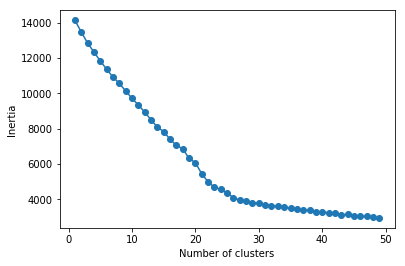

In [92]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 50):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(1, 50), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## create silhouette plots to assess various specifications for `n_clusters` in `KMeans`

In [93]:
# modify this list to include the numbers of clusters you want to see
# I have *arbitrarily* chosen these values
# range_n_clusters = [5, 10, 15, 20, 25]
range_n_clusters = range(2,30)

For n_clusters = 2 The average silhouette_score is : 0.061163579375


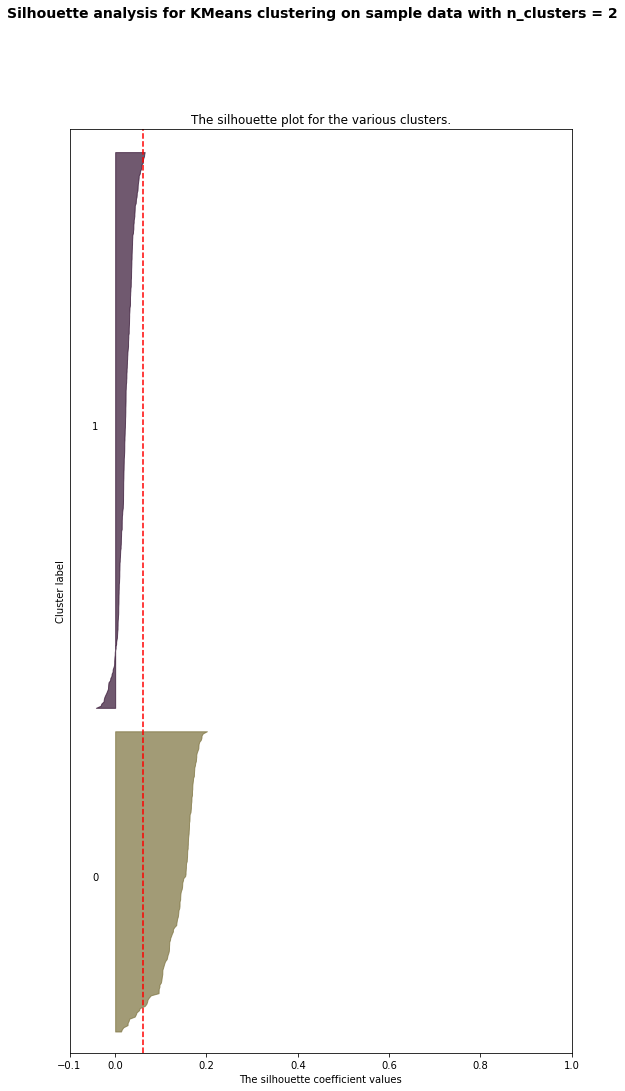

For n_clusters = 3 The average silhouette_score is : 0.0747636070766


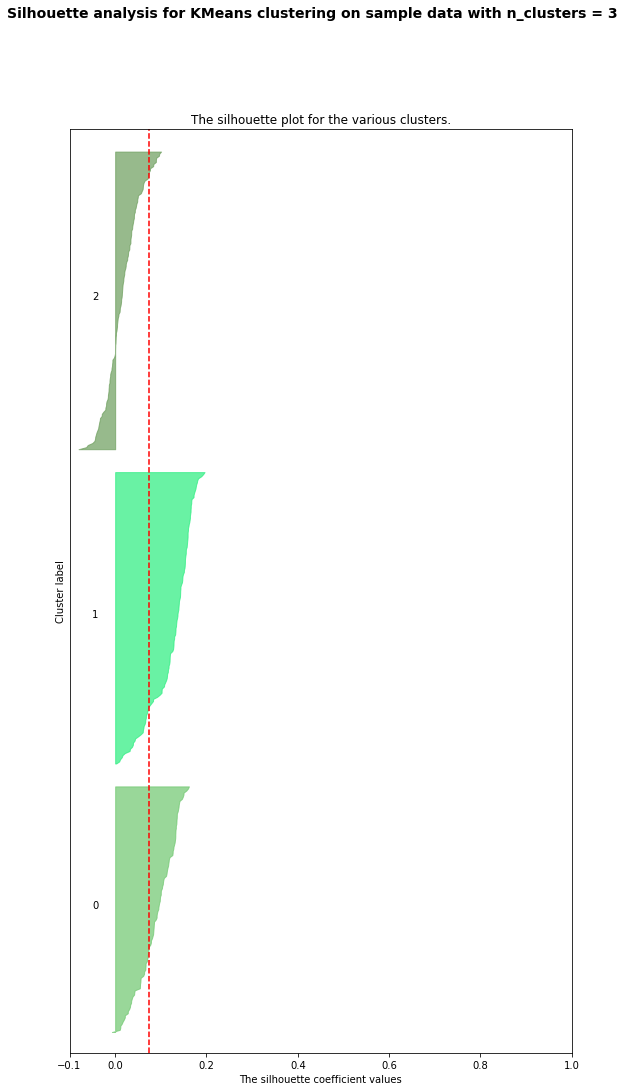

For n_clusters = 4 The average silhouette_score is : 0.0851037073176


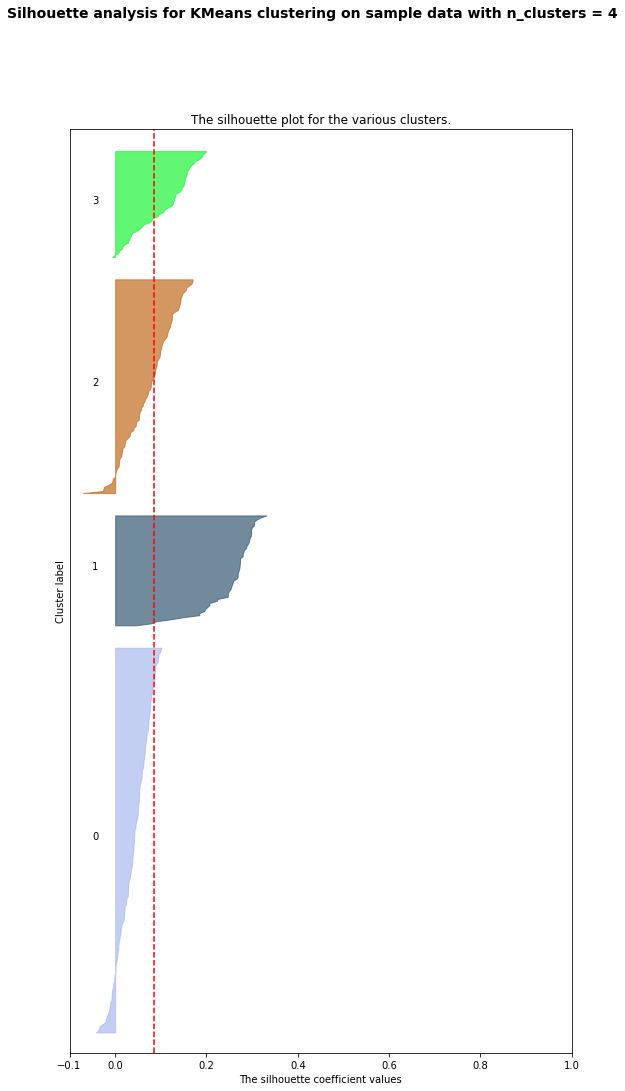

For n_clusters = 5 The average silhouette_score is : 0.113044999894


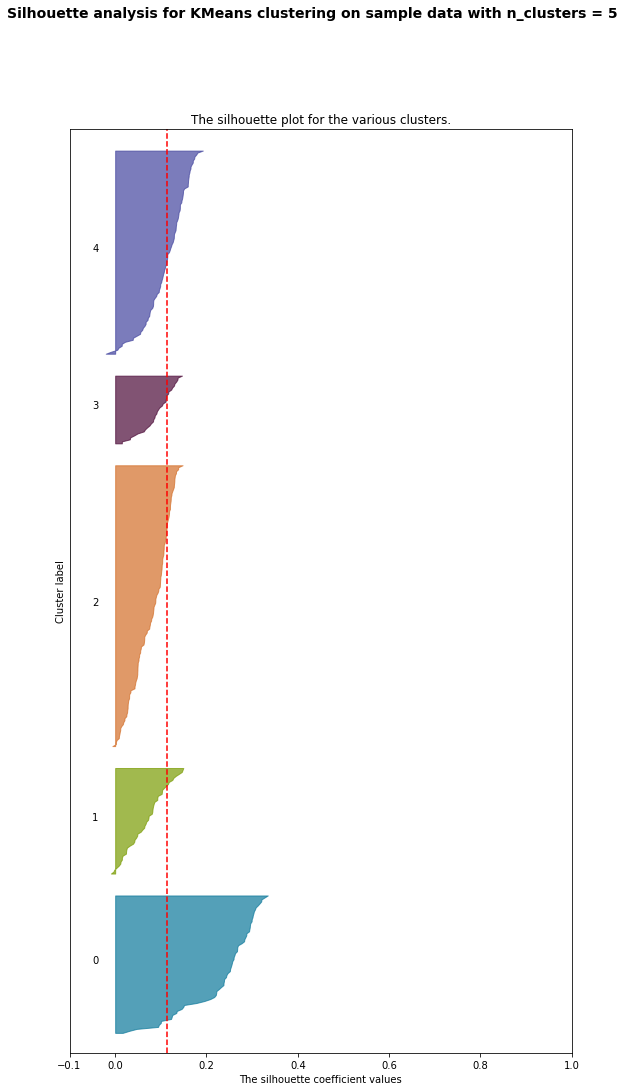

For n_clusters = 6 The average silhouette_score is : 0.119990163986


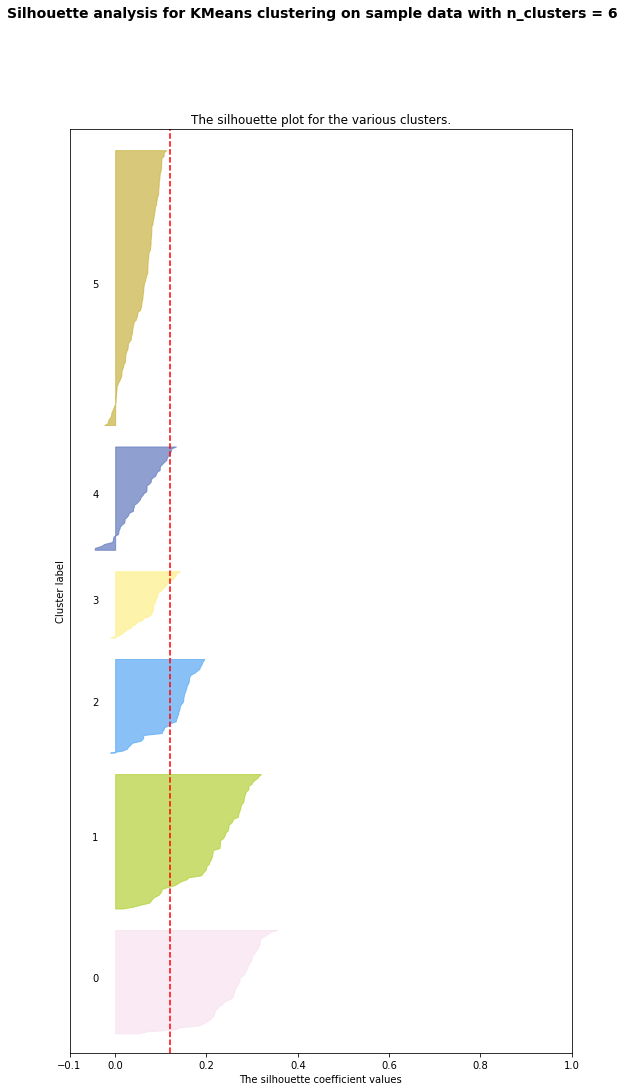

For n_clusters = 7 The average silhouette_score is : 0.132839252769


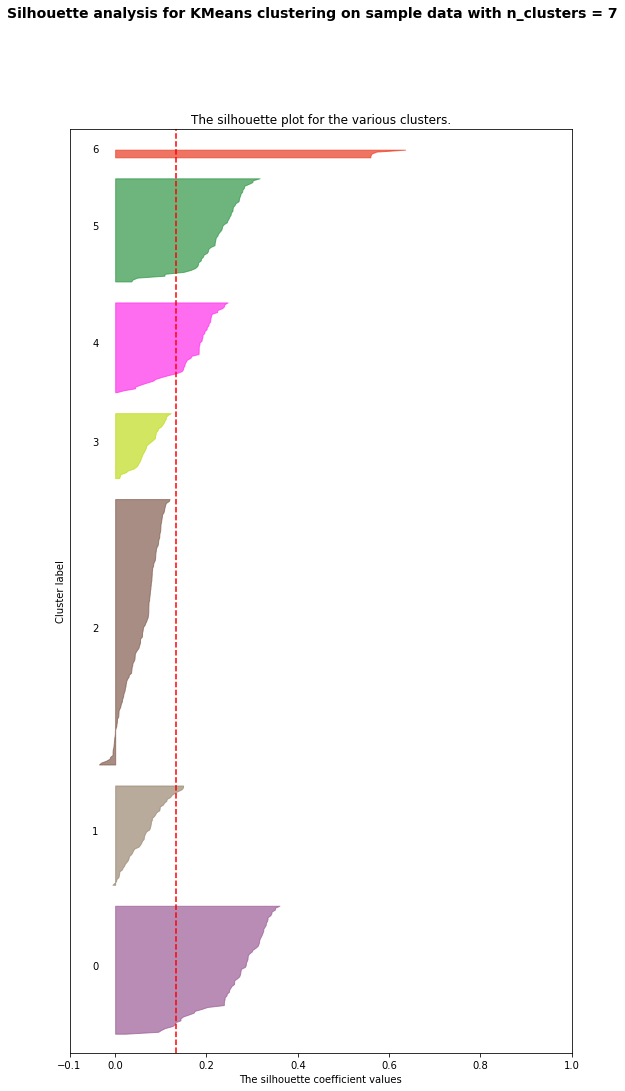

For n_clusters = 8 The average silhouette_score is : 0.111477722876


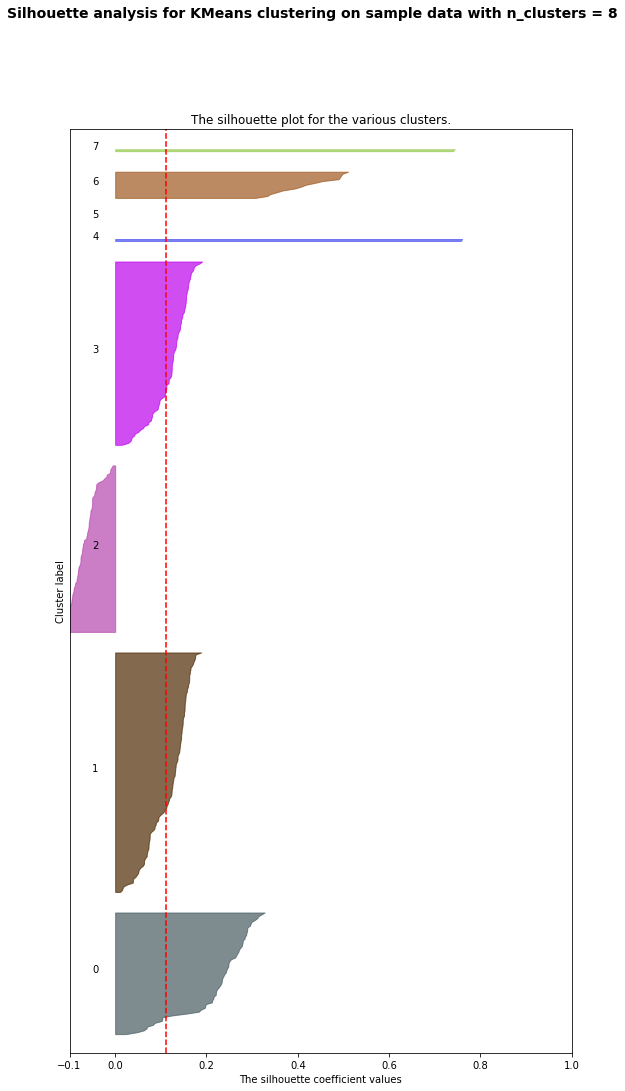

For n_clusters = 9 The average silhouette_score is : 0.138939161758


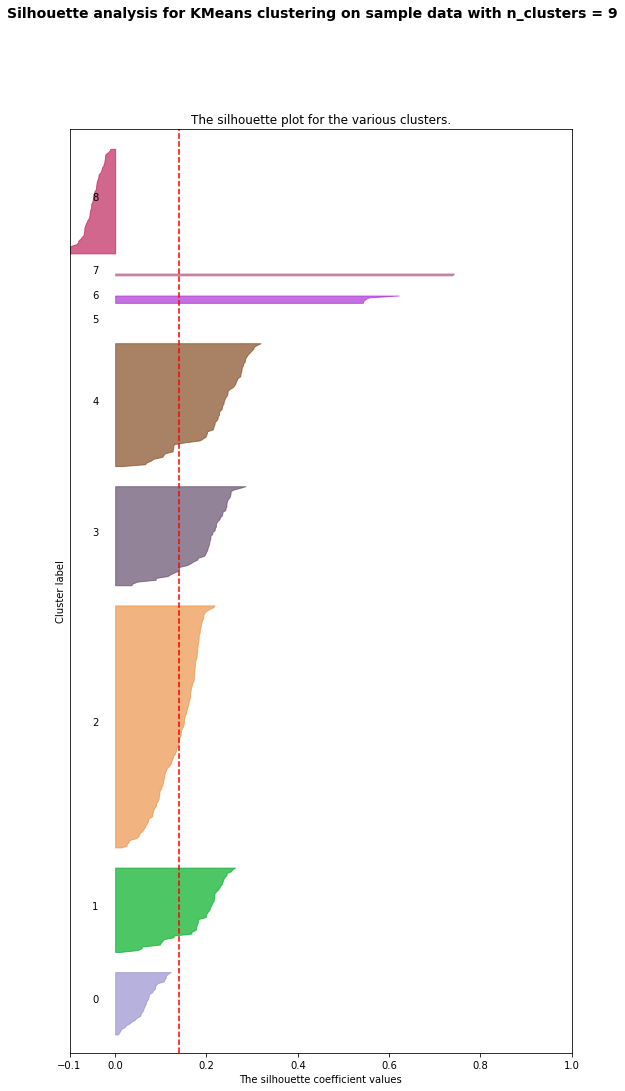

For n_clusters = 10 The average silhouette_score is : 0.145707224032


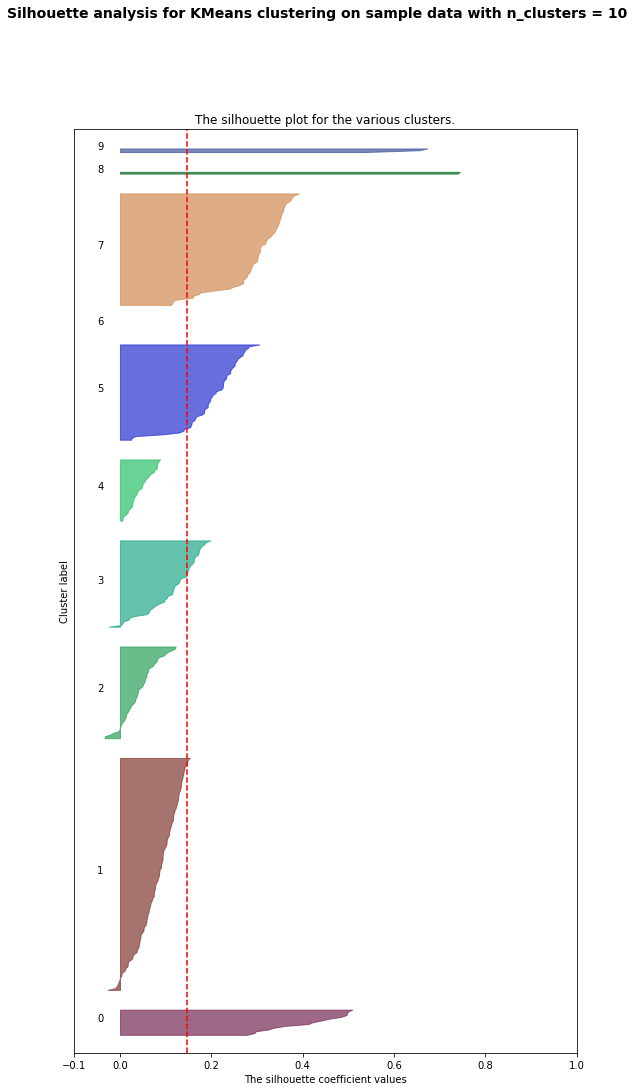

For n_clusters = 11 The average silhouette_score is : 0.165063225232


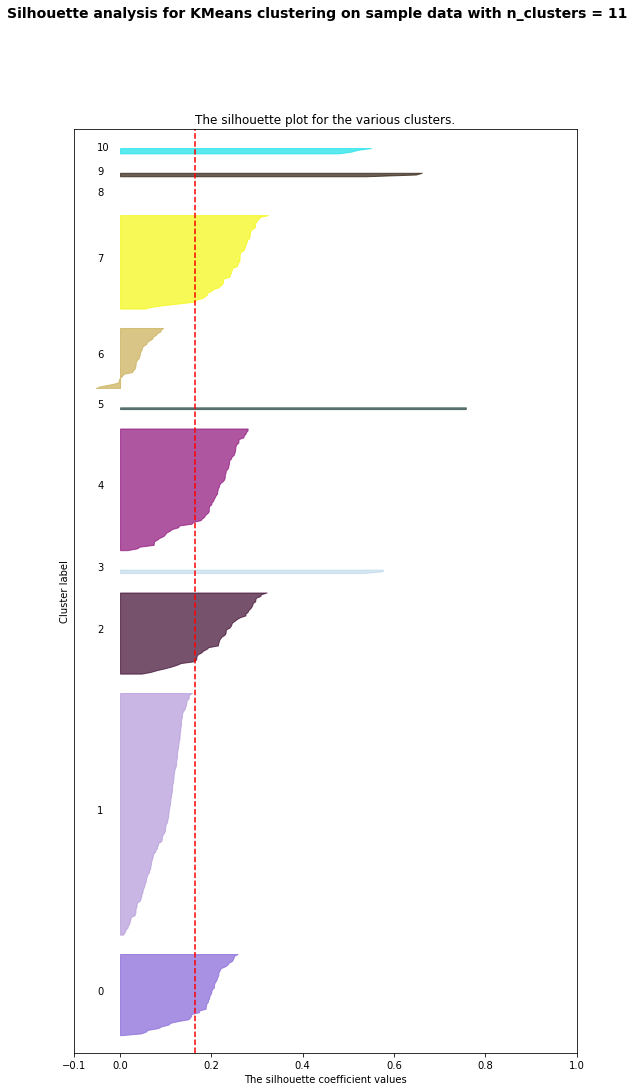

For n_clusters = 12 The average silhouette_score is : 0.185993000533


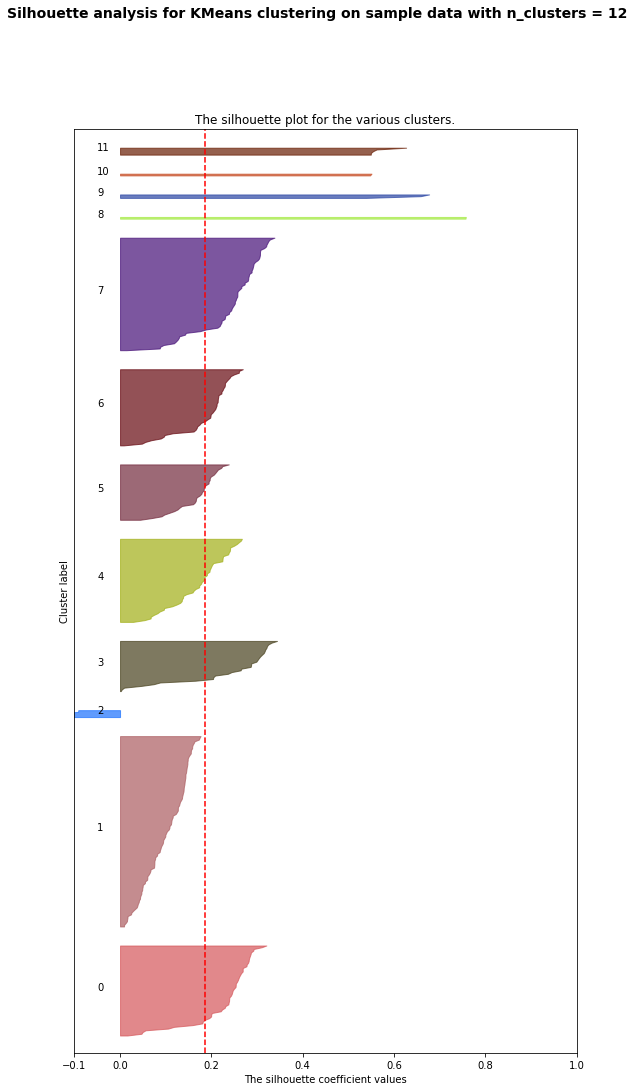

For n_clusters = 13 The average silhouette_score is : 0.178524021601


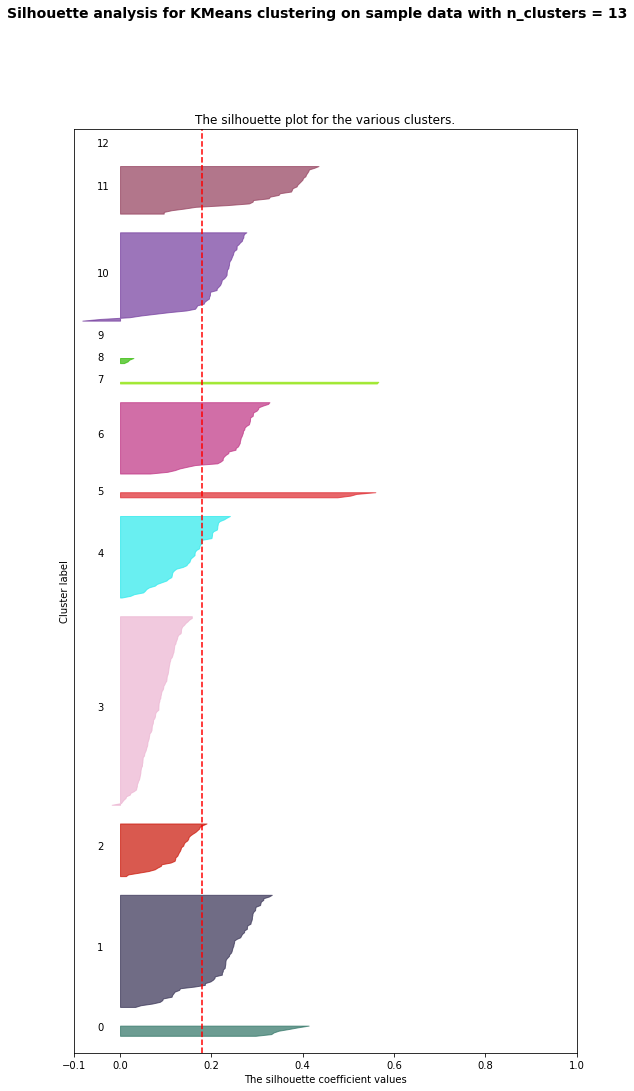

For n_clusters = 14 The average silhouette_score is : 0.178793952517


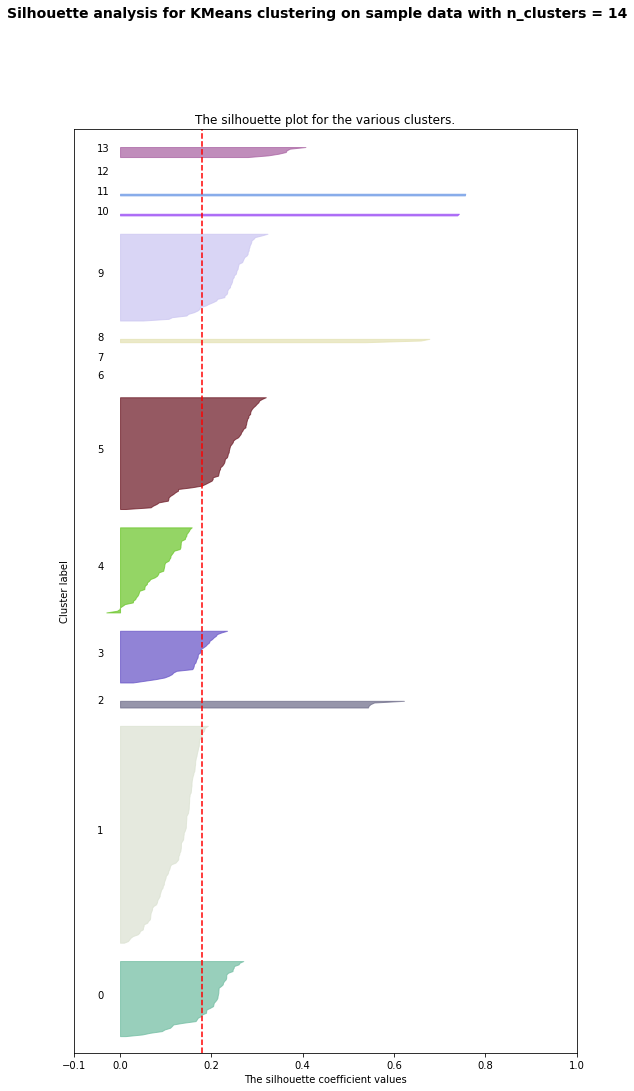

For n_clusters = 15 The average silhouette_score is : 0.190737712467


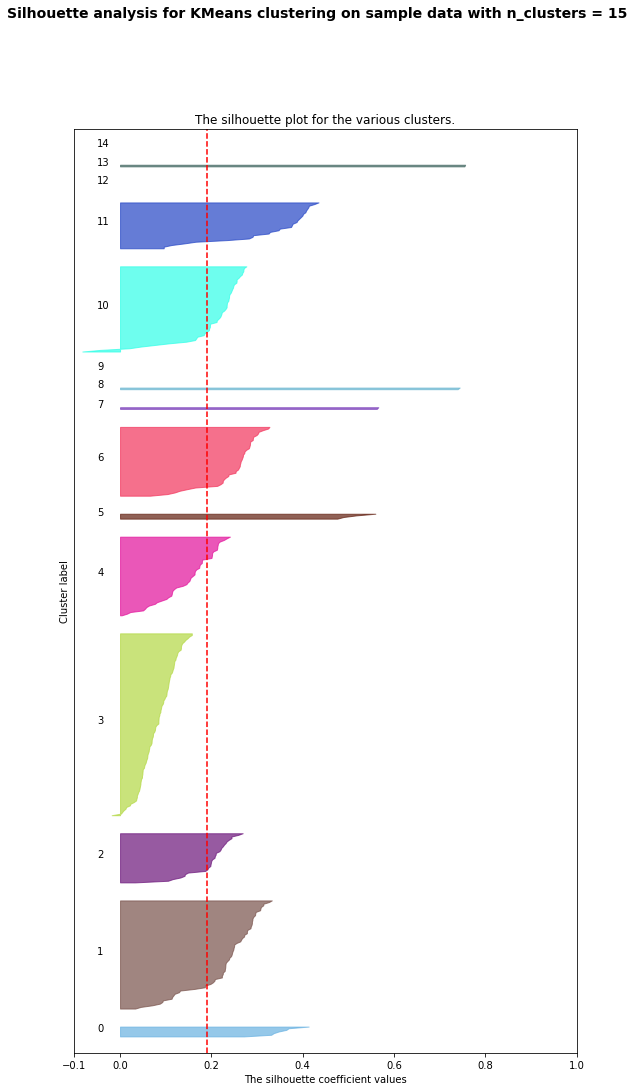

For n_clusters = 16 The average silhouette_score is : 0.184012471726


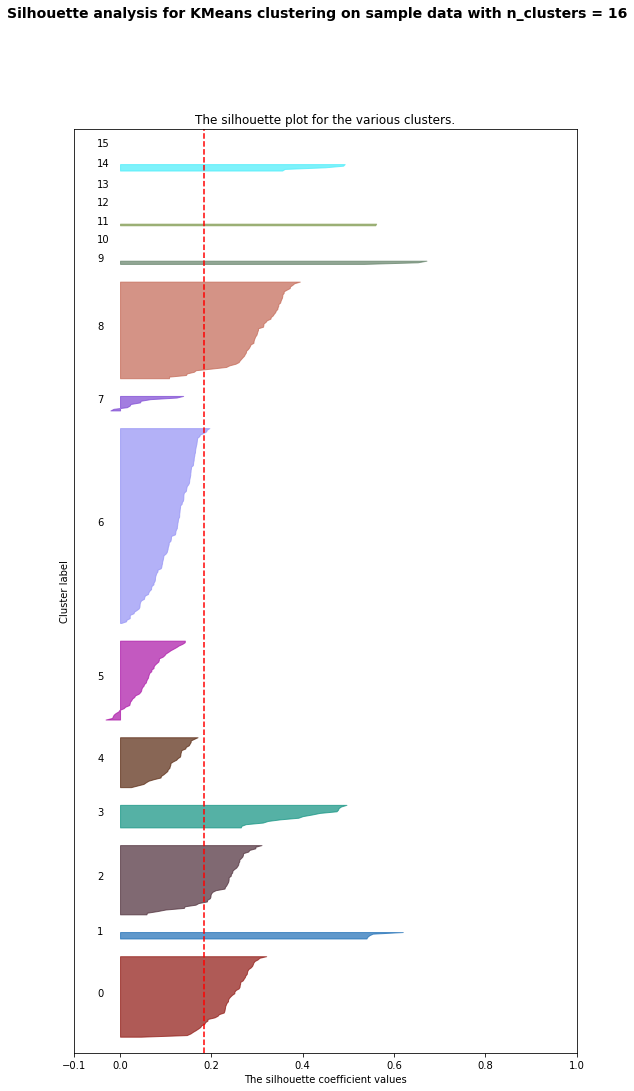

For n_clusters = 17 The average silhouette_score is : 0.196544486047


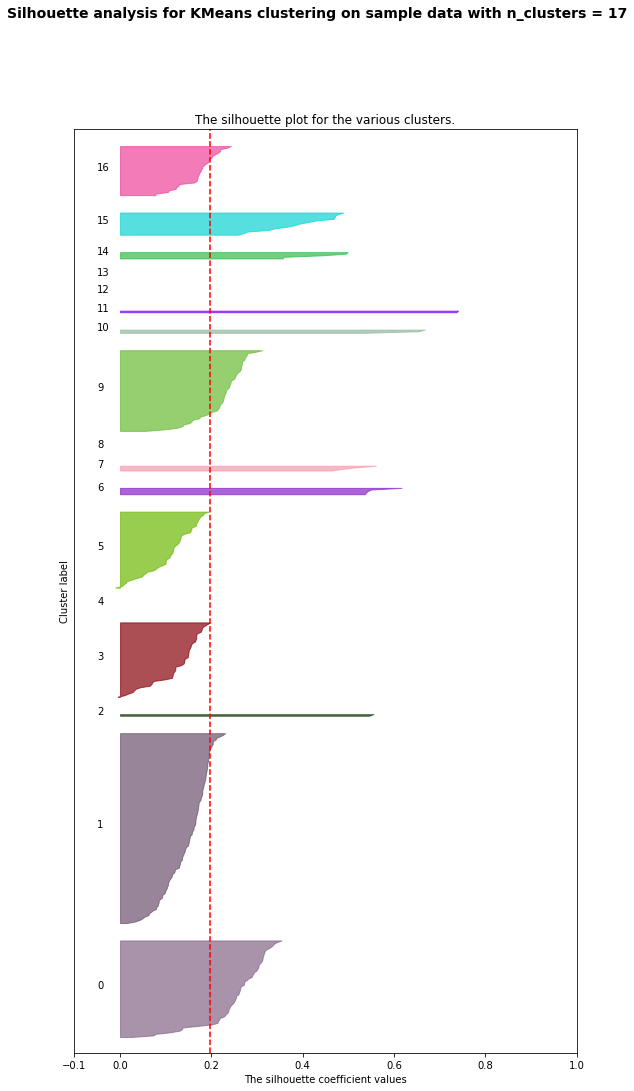

For n_clusters = 18 The average silhouette_score is : 0.205154267593


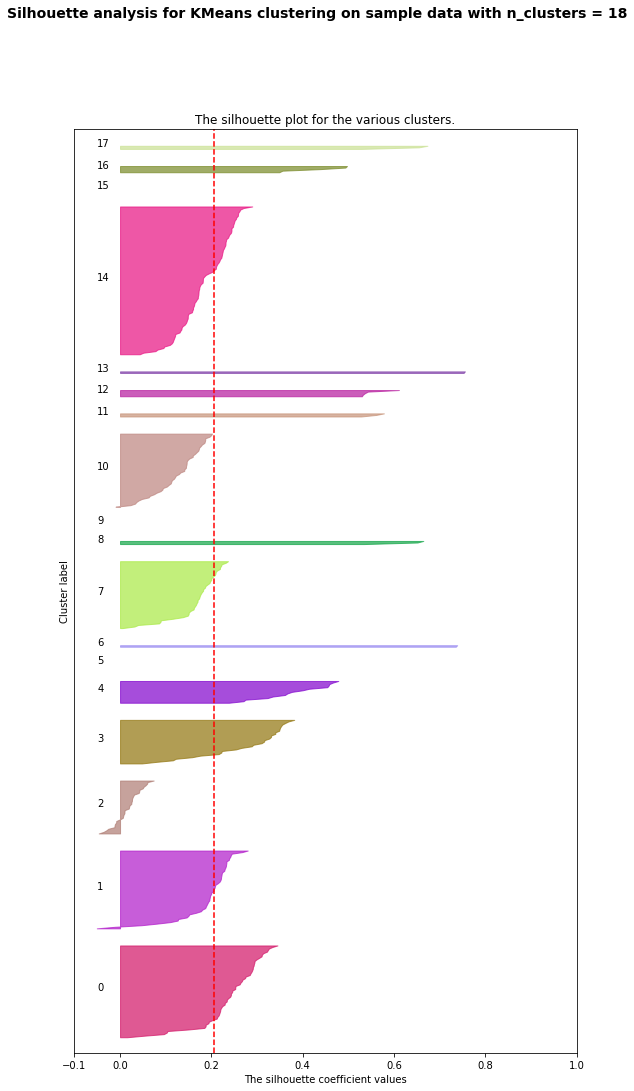

For n_clusters = 19 The average silhouette_score is : 0.210593110338


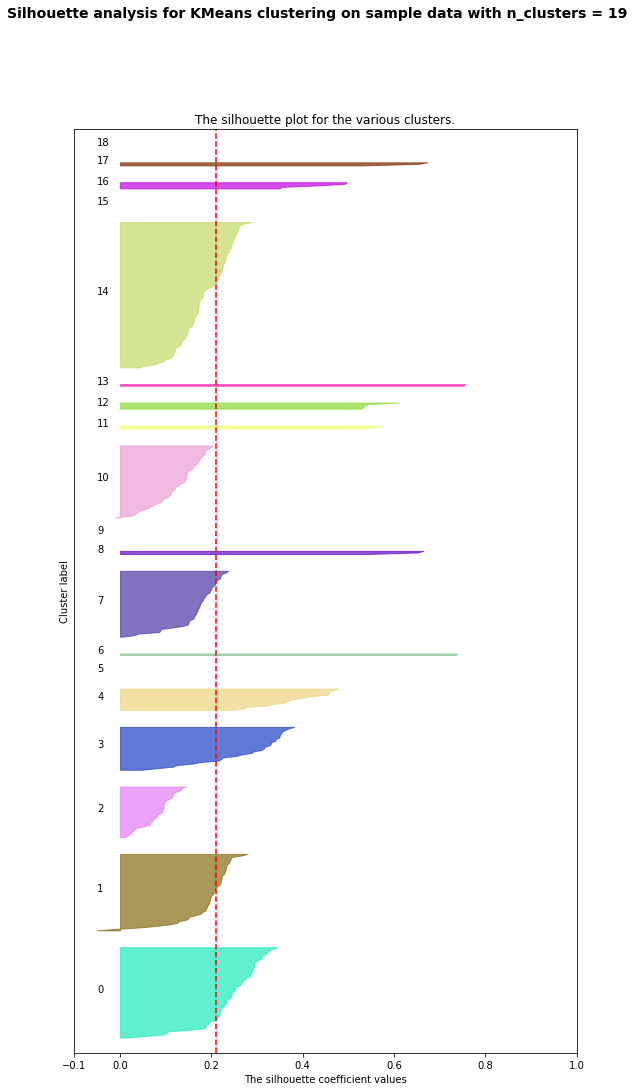

For n_clusters = 20 The average silhouette_score is : 0.219881169401


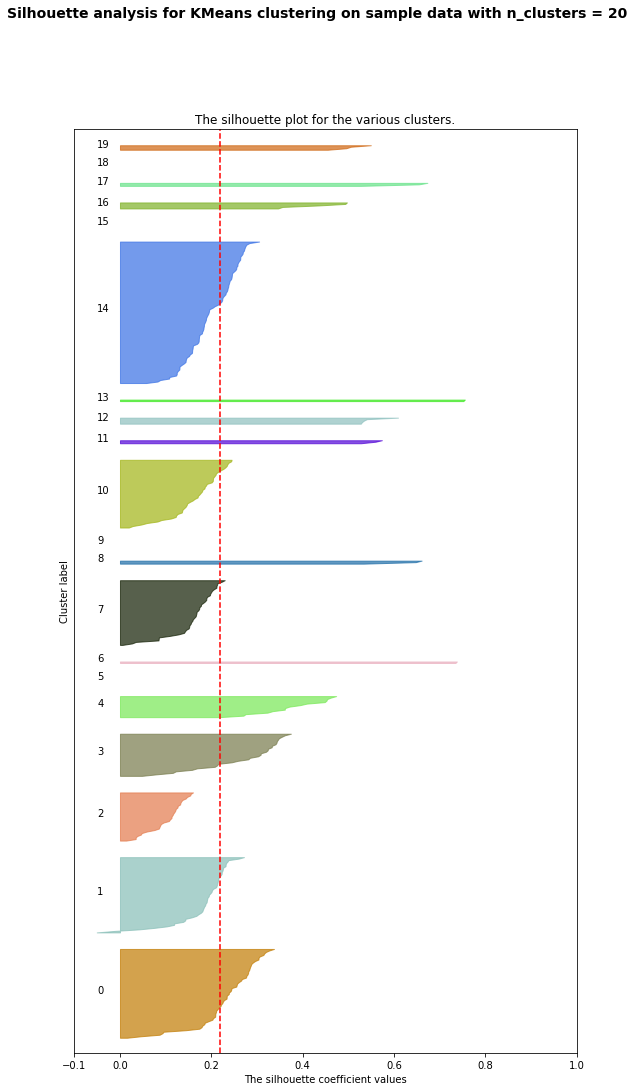

For n_clusters = 21 The average silhouette_score is : 0.222516371705


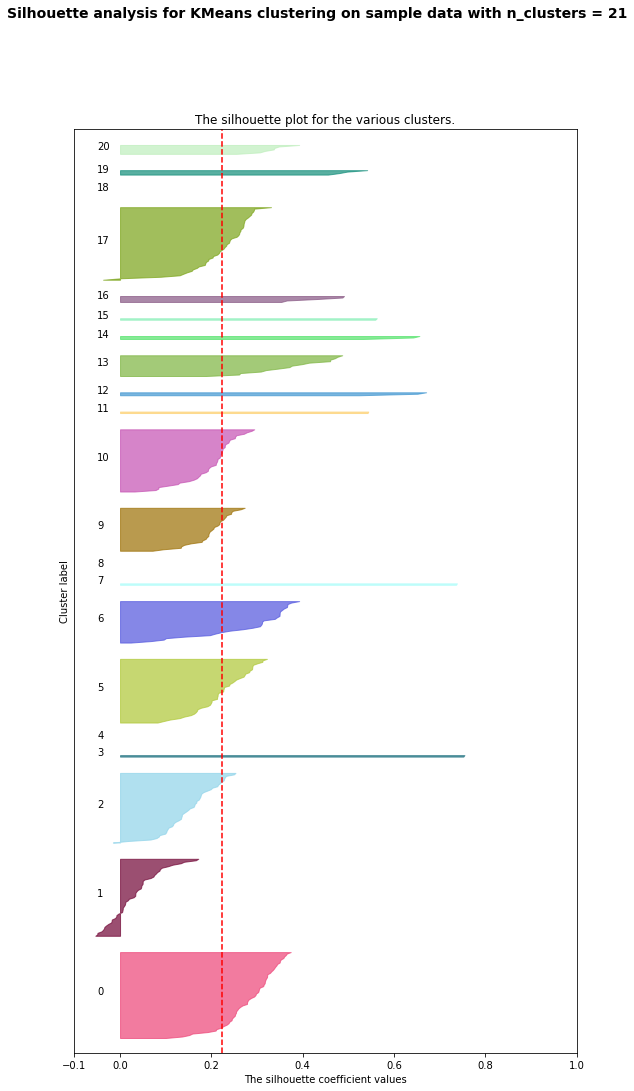

For n_clusters = 22 The average silhouette_score is : 0.197696477204


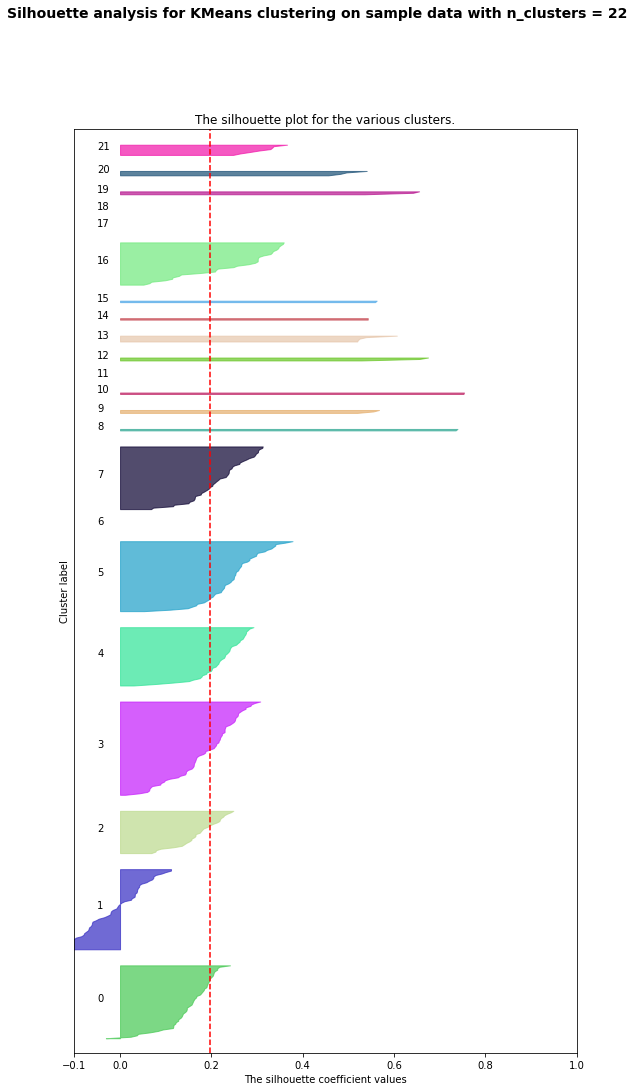

For n_clusters = 23 The average silhouette_score is : 0.247134337533


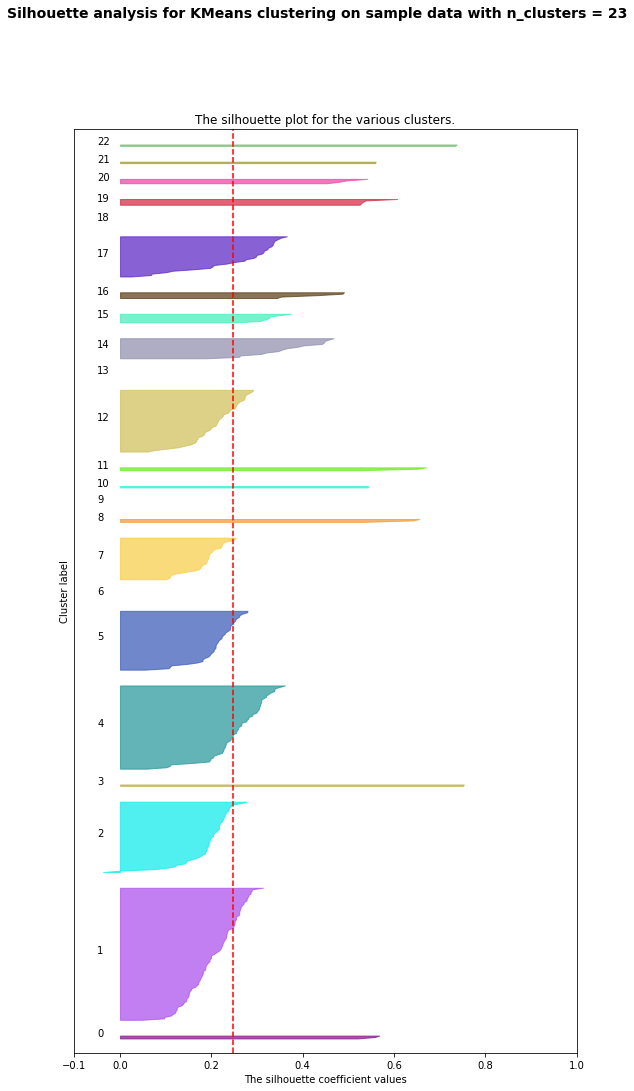

For n_clusters = 24 The average silhouette_score is : 0.214686854388


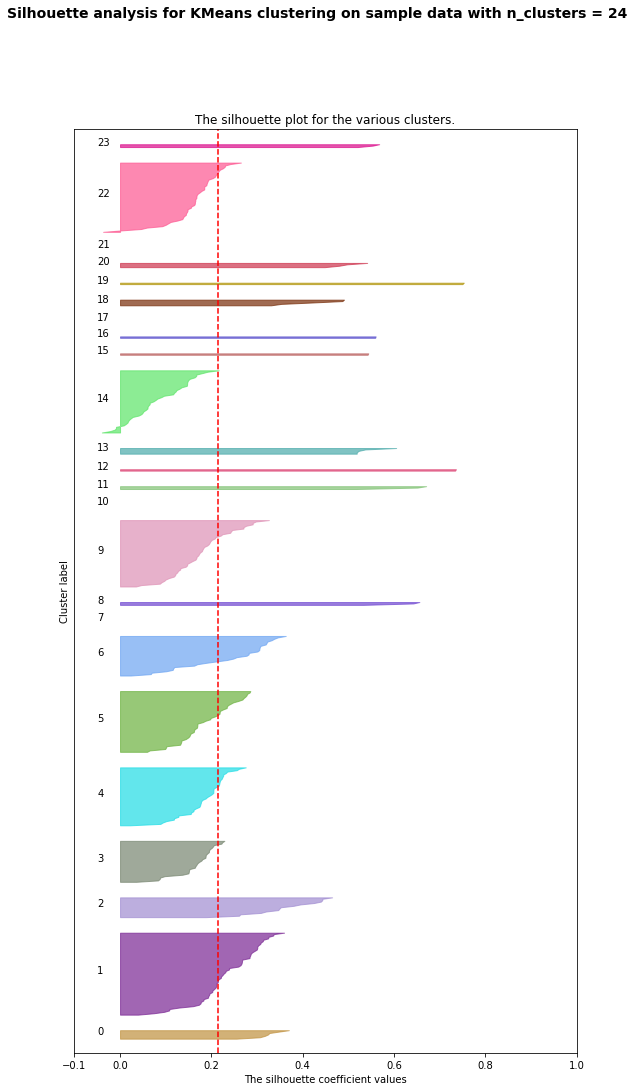

For n_clusters = 25 The average silhouette_score is : 0.213241710711


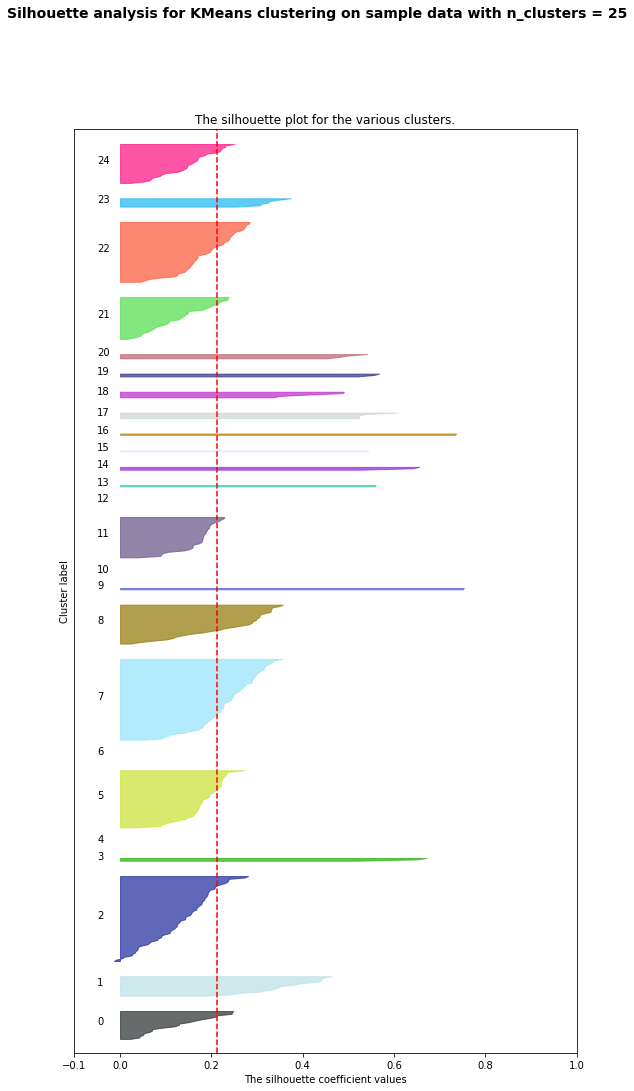

For n_clusters = 26 The average silhouette_score is : 0.20141999662


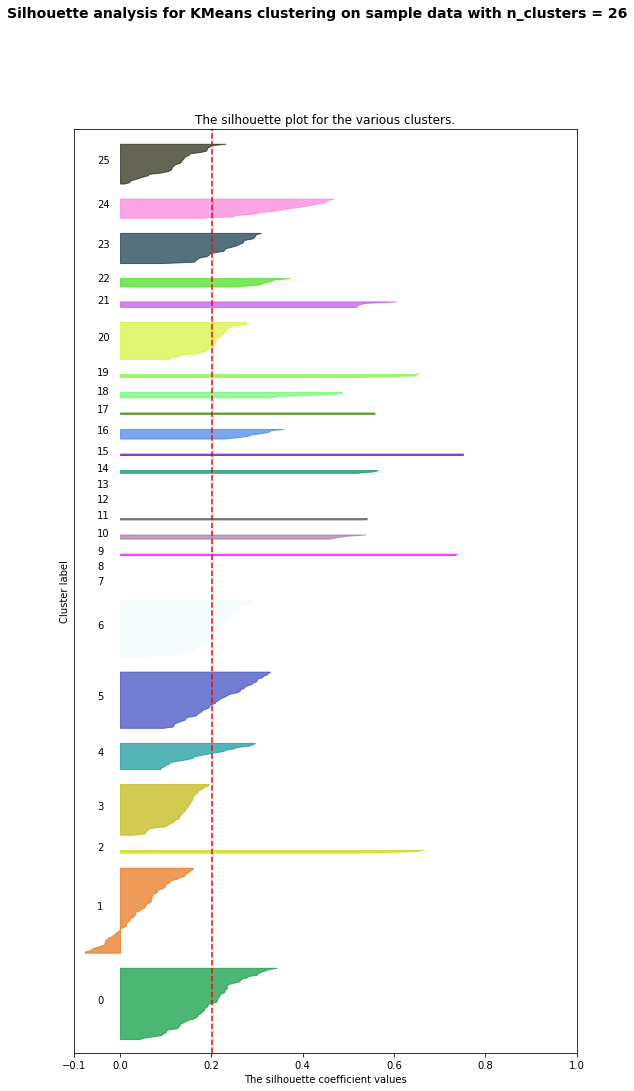

For n_clusters = 27 The average silhouette_score is : 0.204252131554


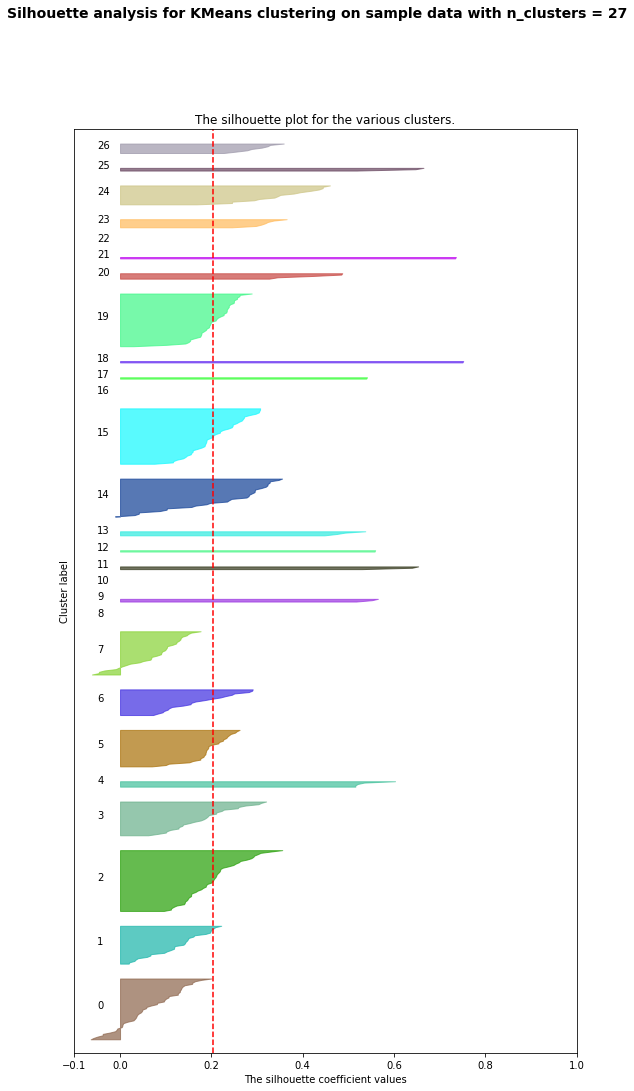

For n_clusters = 28 The average silhouette_score is : 0.20018464302


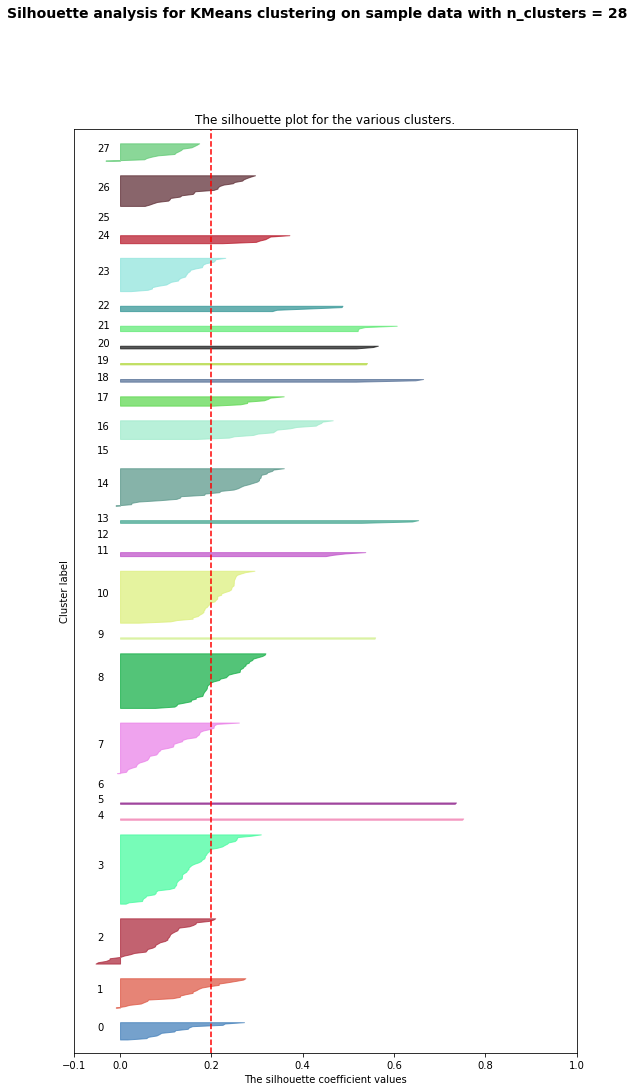

For n_clusters = 29 The average silhouette_score is : 0.207544796998


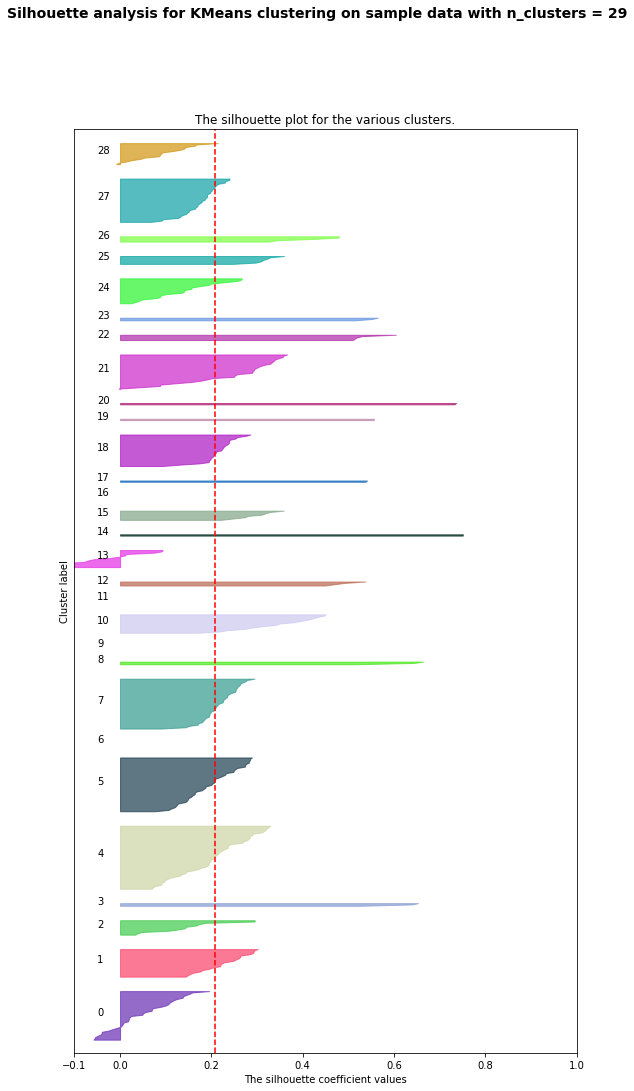

In [94]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## final fit

After you have decided which features to include and the number of clusters you want, fit your final KMeans model. I have **arbitrarily** chosen 5. 

In [101]:
# set the number of clusters in the final model
my_n_clusters = 7

In [102]:
km = KMeans(n_clusters=my_n_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## look at results

The key to knowing if you have chosen the right features and clusters: looking at the images in each cluster and deciding whether they seem to belong together. You could extend this starter code to display the images in this notebook, or you may decide to use Python to write an html file/files to view the images by cluster.

In [103]:
for i in range(0, max(km.labels_)+1):
    print(" ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("Images in cluster: " + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            print(str(j+2) + '_small.jpg')

 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 0
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
11_small.jpg
25_small.jpg
31_small.jpg
44_small.jpg
59_small.jpg
71_small.jpg
73_small.jpg
76_small.jpg
98_small.jpg
103_small.jpg
107_small.jpg
112_small.jpg
117_small.jpg
122_small.jpg
142_small.jpg
162_small.jpg
166_small.jpg
167_small.jpg
168_small.jpg
169_small.jpg
199_small.jpg
208_small.jpg
209_small.jpg
218_small.jpg
223_small.jpg
254_small.jpg
262_small.jpg
263_small.jpg
268_small.jpg
295_small.jpg
297_small.jpg
307_small.jpg
385_small.jpg
393_small.jpg
395_small.jpg
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 1
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
18_small.jpg
19_small.jpg
28_small.jpg
29_small.jpg
47_small.jpg
61_small.jpg
67_small.jpg
119_small.jpg
136_small.jpg
173_small.jpg
181_small.jpg
200_small.jpg
225_small.jpg
236_small.jpg
237_small.jpg
244_small.jpg
276_small.jp

In [104]:
clusters = []
for i in range(0, max(km.labels_)+1):
    print(" ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("Images in cluster: " + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    label_list = []
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            label_list.append(str(j+2) + '_small.jpg')
#             print(str(j+2) + '_small.jpg')
    print(label_list)
    clusters.append(label_list)
# print(clusters)
for c in clusters:
    print(c)
    print("")

 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 0
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
['11_small.jpg', '25_small.jpg', '31_small.jpg', '44_small.jpg', '59_small.jpg', '71_small.jpg', '73_small.jpg', '76_small.jpg', '98_small.jpg', '103_small.jpg', '107_small.jpg', '112_small.jpg', '117_small.jpg', '122_small.jpg', '142_small.jpg', '162_small.jpg', '166_small.jpg', '167_small.jpg', '168_small.jpg', '169_small.jpg', '199_small.jpg', '208_small.jpg', '209_small.jpg', '218_small.jpg', '223_small.jpg', '254_small.jpg', '262_small.jpg', '263_small.jpg', '268_small.jpg', '295_small.jpg', '297_small.jpg', '307_small.jpg', '385_small.jpg', '393_small.jpg', '395_small.jpg']
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 1
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
['18_small.jpg', '19_small.jpg', '28_small.jpg', '29_small.jpg', '47_small.jpg', '61_small.jpg', '67_small.jpg', '119_small

In [105]:
f = open('results.html','w')

i = 0
html = "<html>"
for cluster in clusters:
    i += 1
    html += "<h1 style=\"font-size: 250%; font-family: sans-serif;\">"
    html += "Images in Cluster " + str(i)
    html += "</h1>"
    for img in cluster:
        html += "<img src= ./img_small/"
        html += img
        html += " width = 100>"
    html += "<br><br><br><br>"
html += "</html>"

f.write(html)
f.close()